# ĐỒ ÁN PTDLKD

##### Import thư viện

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder as LE
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

##### Import dataset

In [2]:
df_marketing = pd.read_csv('HR_Employeee_Attrition.csv')
df_marketing.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df_marketing.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

#### Kiểm tra dữ liệu Null

In [4]:
df_marketing.isnull().sum().sort_values(ascending=False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

#### Kiểm tra kiểu dữ liệu của các cột thuộc tính

In [5]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Sử dụng Label Encoder để chuyển đổi các cột từ object sang numeric


In [6]:
df_marketing['Attrition'] = LE().fit_transform(df_marketing['Attrition'])
df_marketing['Department'] = LE().fit_transform(df_marketing['Department'])
df_marketing['EducationField'] = LE().fit_transform(df_marketing['EducationField'])
df_marketing['Gender'] = LE().fit_transform(df_marketing['Gender'])
df_marketing['JobRole'] = LE().fit_transform(df_marketing['JobRole'])
df_marketing['MaritalStatus'] = LE().fit_transform(df_marketing['MaritalStatus'])
df_marketing['Over18'] = LE().fit_transform(df_marketing['Over18'])
df_marketing['OverTime'] = LE().fit_transform(df_marketing['OverTime'])
df_marketing['BusinessTravel'] = LE().fit_transform(df_marketing['BusinessTravel'])
del df_marketing['EmployeeNumber']
del df_marketing['EmployeeCount']

In [7]:
# Sau khi xử lý 
df_marketing.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 33 columns]

#Phân loại data:
1. Categorical Features: Age, BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction,
Gender,  JobInvolvement, JobLevel , JobRole, JobSatisfaction, MaritalStatus, NumCompaniesWorked, OverTime, PercentSalaryHike,
PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance, 
2. Continuous Features: DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, TotalWorkingYears, YearsAtCompany,
YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
3. Label: Attrtion
4. Unnecessary Label: EmployeeCount, EmployeeNumber, Over18, StandardHours

# 4. Feature Selection

# Chi-square test
Đặt giả thuyết:

Null hypothesis (H0) : output feature không phụ thuộc input feature
Alternate hypothesis (H1): output feature có phụ thuộc input feature
Nếu ta chấp nhận giả thuyết H0, tức label không phụ thuộc vào input feature đang xét và ngược lại

Mức alpha xét = 0.05

Mục tiêu: lấy ra được những feature có tác động tới output

In [8]:
#chisqaure test
from sklearn.feature_selection import SelectKBest, chi2
categorical_features = df_marketing[["Age", "BusinessTravel", "Department", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobLevel" , "JobRole", "JobSatisfaction", "MaritalStatus",
"NumCompaniesWorked", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", 
"TrainingTimesLastYear", "WorkLifeBalance"]]

In [9]:
best_features = SelectKBest(chi2, k=20)
best_features.fit(categorical_features, df_marketing["Attrition"])

SelectKBest(k=20, score_func=<function chi2 at 0x000001B04FDEA5F0>)

In [10]:
from sklearn.feature_selection import SelectKBest, chi2
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["Age", "BusinessTravel", "Department", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobLevel" , "JobRole", "JobSatisfaction", "MaritalStatus",
"NumCompaniesWorked", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", 
"TrainingTimesLastYear", "WorkLifeBalance"]
df_score.sort_values(by='p_values')

p_values  chi2_values                   columns
0   4.574015e-20    84.155277                       Age
13  1.345990e-15    63.845067                  OverTime
17  4.987041e-07    25.268826          StockOptionLevel
8   5.916575e-07    24.939242                  JobLevel
11  1.493631e-05    18.745657             MaritalStatus
9   2.693233e-03     9.004448                   JobRole
10  8.096760e-03     7.011947           JobSatisfaction
5   8.665045e-03     6.890594   EnvironmentSatisfaction
12  1.116632e-02     6.438654        NumCompaniesWorked
7   3.186740e-02     4.605616            JobInvolvement
18  7.897860e-02     3.085796     TrainingTimesLastYear
16  2.483906e-01     1.332333  RelationshipSatisfaction
2   2.489303e-01     1.329297                Department
19  2.974609e-01     1.085543           WorkLifeBalance
4   3.608561e-01     0.834912            EducationField
3   4.705679e-01     0.520642                 Education
6   4.751014e-01     0.510087                    Gender
14  6.278213e-01     0.235027         PercentSalaryHike
15  9.820524e-01     0.000506         PerformanceRating
1   9.988158e-01     0.000002            BusinessTravel

In [11]:
#chọn ra những giá trị < 0.05, < alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0                         Age
5     EnvironmentSatisfaction
7              JobInvolvement
8                    JobLevel
9                     JobRole
10            JobSatisfaction
11              MaritalStatus
12         NumCompaniesWorked
13                   OverTime
17           StockOptionLevel
Name: columns, dtype: object

# Anova F-test
Đặt giả thuyết:

Null hypothesis (H0) : 2 groups có cùng phương sai
Alternate hypothesis (H1): 2 groups có phương sai khác nhau
Nếu ta chấp nhận giả thuyết H0, tức input feature hiện tại không ảnh hưởng tới label và ngược lại

Mức alpha xét = 0.05

Mục tiêu: lấy ra được những feature có tác động tới output

In [12]:
#anova test
from sklearn.feature_selection import SelectKBest, f_classif
continous_features = df_marketing[[ "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "TotalWorkingYears", 
"YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]

In [13]:
best_features = SelectKBest(f_classif, k=10)
best_features.fit(continous_features , df_marketing["Attrition"])

SelectKBest()

In [14]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "TotalWorkingYears", 
"YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
df_score.sort_values(by='p_values')

p_values  anova_values                  columns
5  4.061878e-11     44.252491        TotalWorkingYears
7  6.003186e-10     38.838303       YearsInCurrentRole
3  7.147364e-10     38.488819            MonthlyIncome
9  1.736987e-09     36.712311     YearsWithCurrManager
6  2.318872e-07     27.001624           YearsAtCompany
1  2.793060e-03      8.968277         DistanceFromHome
0  2.985816e-02      4.726640                DailyRate
8  2.057900e-01      1.602218  YearsSinceLastPromotion
4  5.611236e-01      0.337916              MonthlyRate
2  7.931348e-01      0.068796               HourlyRate

In [15]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0               DailyRate
1        DistanceFromHome
3           MonthlyIncome
5       TotalWorkingYears
6          YearsAtCompany
7      YearsInCurrentRole
9    YearsWithCurrManager
Name: columns, dtype: object

# 5. Xây dựng mô hình
1. Decision Tree ( ID3, CART)
2. Random Forest
3. K-Nearest Neighbors
4. Logistic Regression

In [16]:
df_marketing.drop(columns=["Over18", "StandardHours"], inplace=True)

In [17]:
label = df_marketing.Attrition
df_marketing.drop(columns=["Attrition"], inplace=True)

In [18]:
df_marketing.head(18)

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0    41               2       1102           2                 1          2   
1    49               1        279           1                 8          1   
2    37               2       1373           1                 2          2   
3    33               1       1392           1                 3          4   
4    27               2        591           1                 2          1   
5    32               1       1005           1                 2          2   
6    59               2       1324           1                 3          3   
7    30               2       1358           1                24          1   
8    38               1        216           1                23          3   
9    36               2       1299           1                27          3   
10   35               2        809           1                16          3   
11   29               2        153           1                15          2   
12   31               2        670           1                26          1   
13   34               2       1346           1                19          2   
14   28               2        103           1                24          3   
15   29               2       1389           1                21          4   
16   32               2        334           1                 5          2   
17   22               0       1123           1                16          2   

    EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                1                        2       0          94  ...   
1                1                        3       1          61  ...   
2                4                        4       1          92  ...   
3                1                        4       0          56  ...   
4                3                        1       1          40  ...   
5                1                        4       1          79  ...   
6                3                        3       0          81  ...   
7                1                        4       1          67  ...   
8                1                        4       1          44  ...   
9                3                        3       1          94  ...   
10               3                        1       1          84  ...   
11               1                        4       0          49  ...   
12               1                        1       1          31  ...   
13               3                        2       1          93  ...   
14               1                        3       1          50  ...   
15               1                        2       0          51  ...   
16               1                        1       1          80  ...   
17               3                        4       1          96  ...   

    PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                   3                         1                 0   
1                   4                         4                 1   
2                   3                         2                 0   
3                   3                         3                 0   
4                   3                         4                 1   
5                   3                         3                 0   
6                   4                         1                 3   
7                   4                         2                 1   
8                   4                         2                 0   
9                   3                         2                 2   
10                  3                         3                 1   
11                  3                         4                 0   
12                  3                         4                 1   
13                  3                         3                 1   
14                  3                         2                 0   
15                  3        

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_marketing, label, test_size=0.3, random_state=42)

In [20]:
#Decision Tree (CART)
from sklearn import tree
import time
from datetime import timedelta
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
start_cart = time.time()
cart_pred = clf1.fit(X_train, y_train).predict(X_test)
end_cart = time.time()
times_cart = timedelta(seconds=round(end_cart - start_cart,4)).total_seconds()
print("Time decision tree (CART)",times_cart)

Time decision tree (CART) 0.0559


In [21]:
#Decision Tree (CART)
import sklearn.metrics as metrics
cart_score = metrics.accuracy_score(y_test, cart_pred)
accuracies_cart= cart_score
print("Accuracy",cart_score)
print("Report",metrics.classification_report(y_test,cart_pred))

Accuracy 0.7845804988662132
Report               precision    recall  f1-score   support

           0       0.89      0.85      0.87       380
           1       0.28      0.36      0.32        61

    accuracy                           0.78       441
   macro avg       0.59      0.61      0.59       441
weighted avg       0.81      0.78      0.80       441



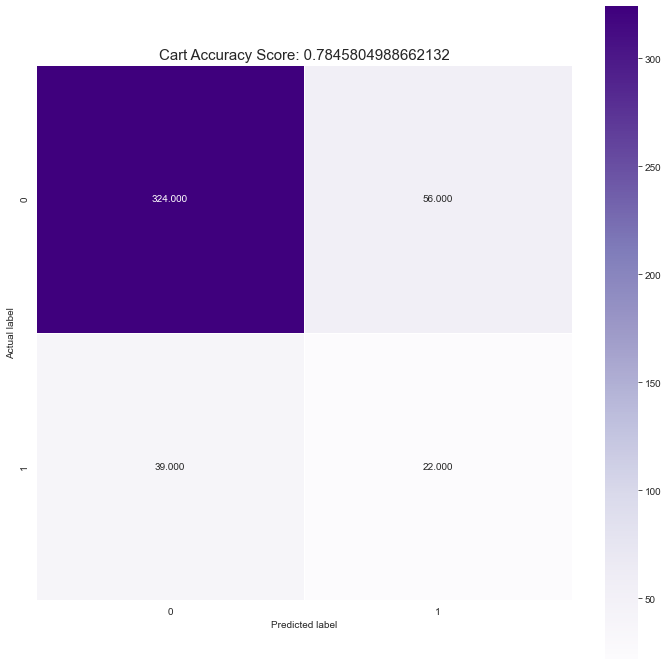

In [22]:
#Decision Tree (CART)
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
ax= sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Purples')
ax.set_ylabel ('Actual label')
ax.set_xlabel('Predicted label')
title = 'Cart Accuracy Score: {0}'.format(cart_score)
plt.title(title,size=15)
plt.show()

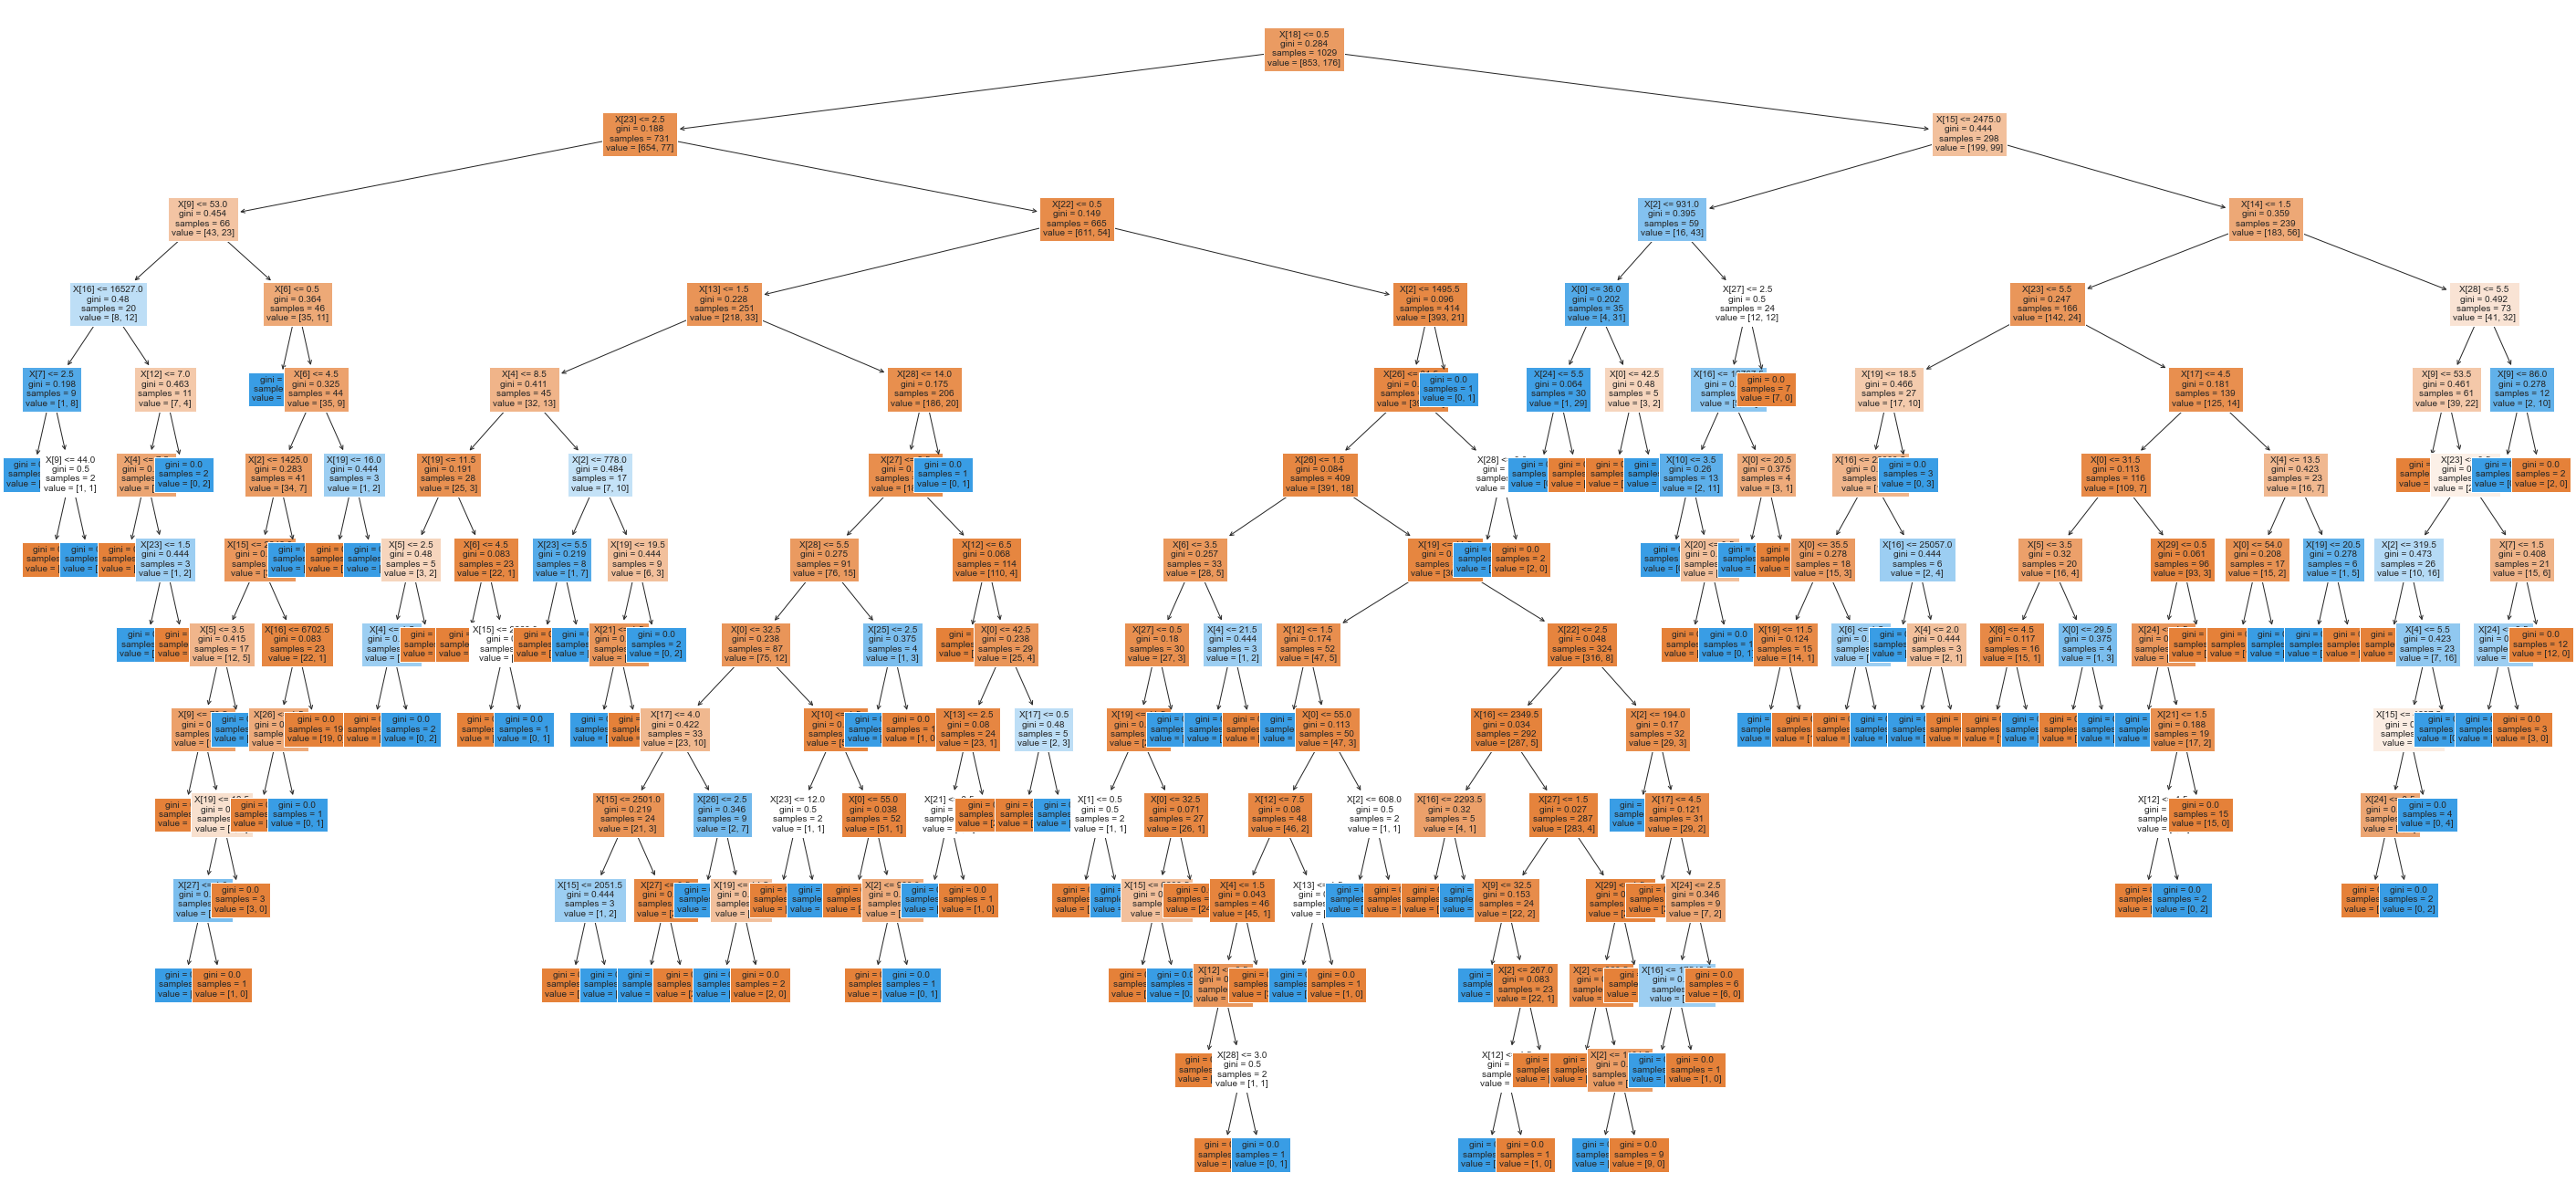

In [23]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree_cart',dpi=100)
plt.show()

In [24]:
#Decision Tree (ID3)
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tree = time.time()
id3_pred = clf.fit(X_train, y_train).predict(X_test)
end_tree = time.time()
times_id3 = timedelta(seconds=round(end_tree - start_tree,4)).total_seconds()
print("Time decision tree (ID3)",times_id3)

Time decision tree (ID3) 0.0219


In [25]:
#Decision Tree (ID3)
id3_score = metrics.accuracy_score(y_test, id3_pred)
accuracies_id3=id3_score
print("Accuracy",accuracies_id3)
print("Report",metrics.classification_report(y_test,id3_pred))

Accuracy 0.7981859410430839
Report               precision    recall  f1-score   support

           0       0.89      0.87      0.88       380
           1       0.31      0.36      0.33        61

    accuracy                           0.80       441
   macro avg       0.60      0.61      0.61       441
weighted avg       0.81      0.80      0.81       441



Text(0.5, 1.0, 'ID3 Accuracy Score: 0.7981859410430839')

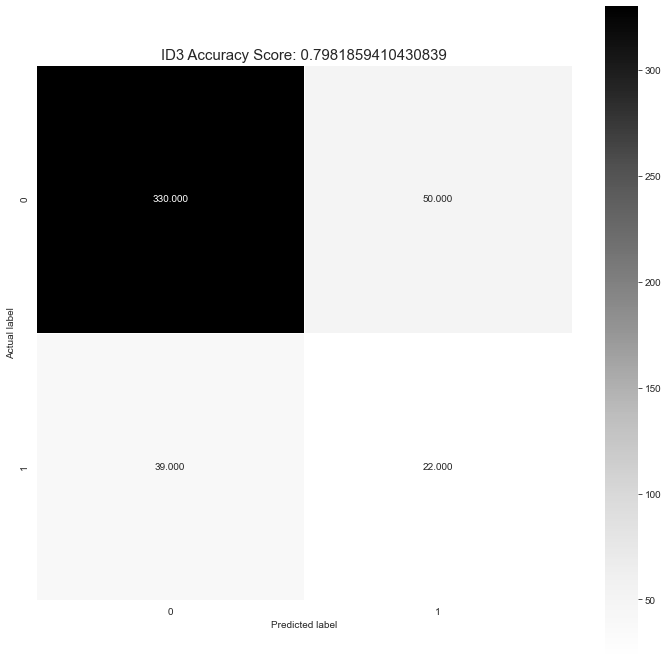

In [26]:
#Decision Tree (ID3)
id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12,12))
ax =sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Greys')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title = 'ID3 Accuracy Score: {0}'.format(id3_score)
plt.title(title,size=15)

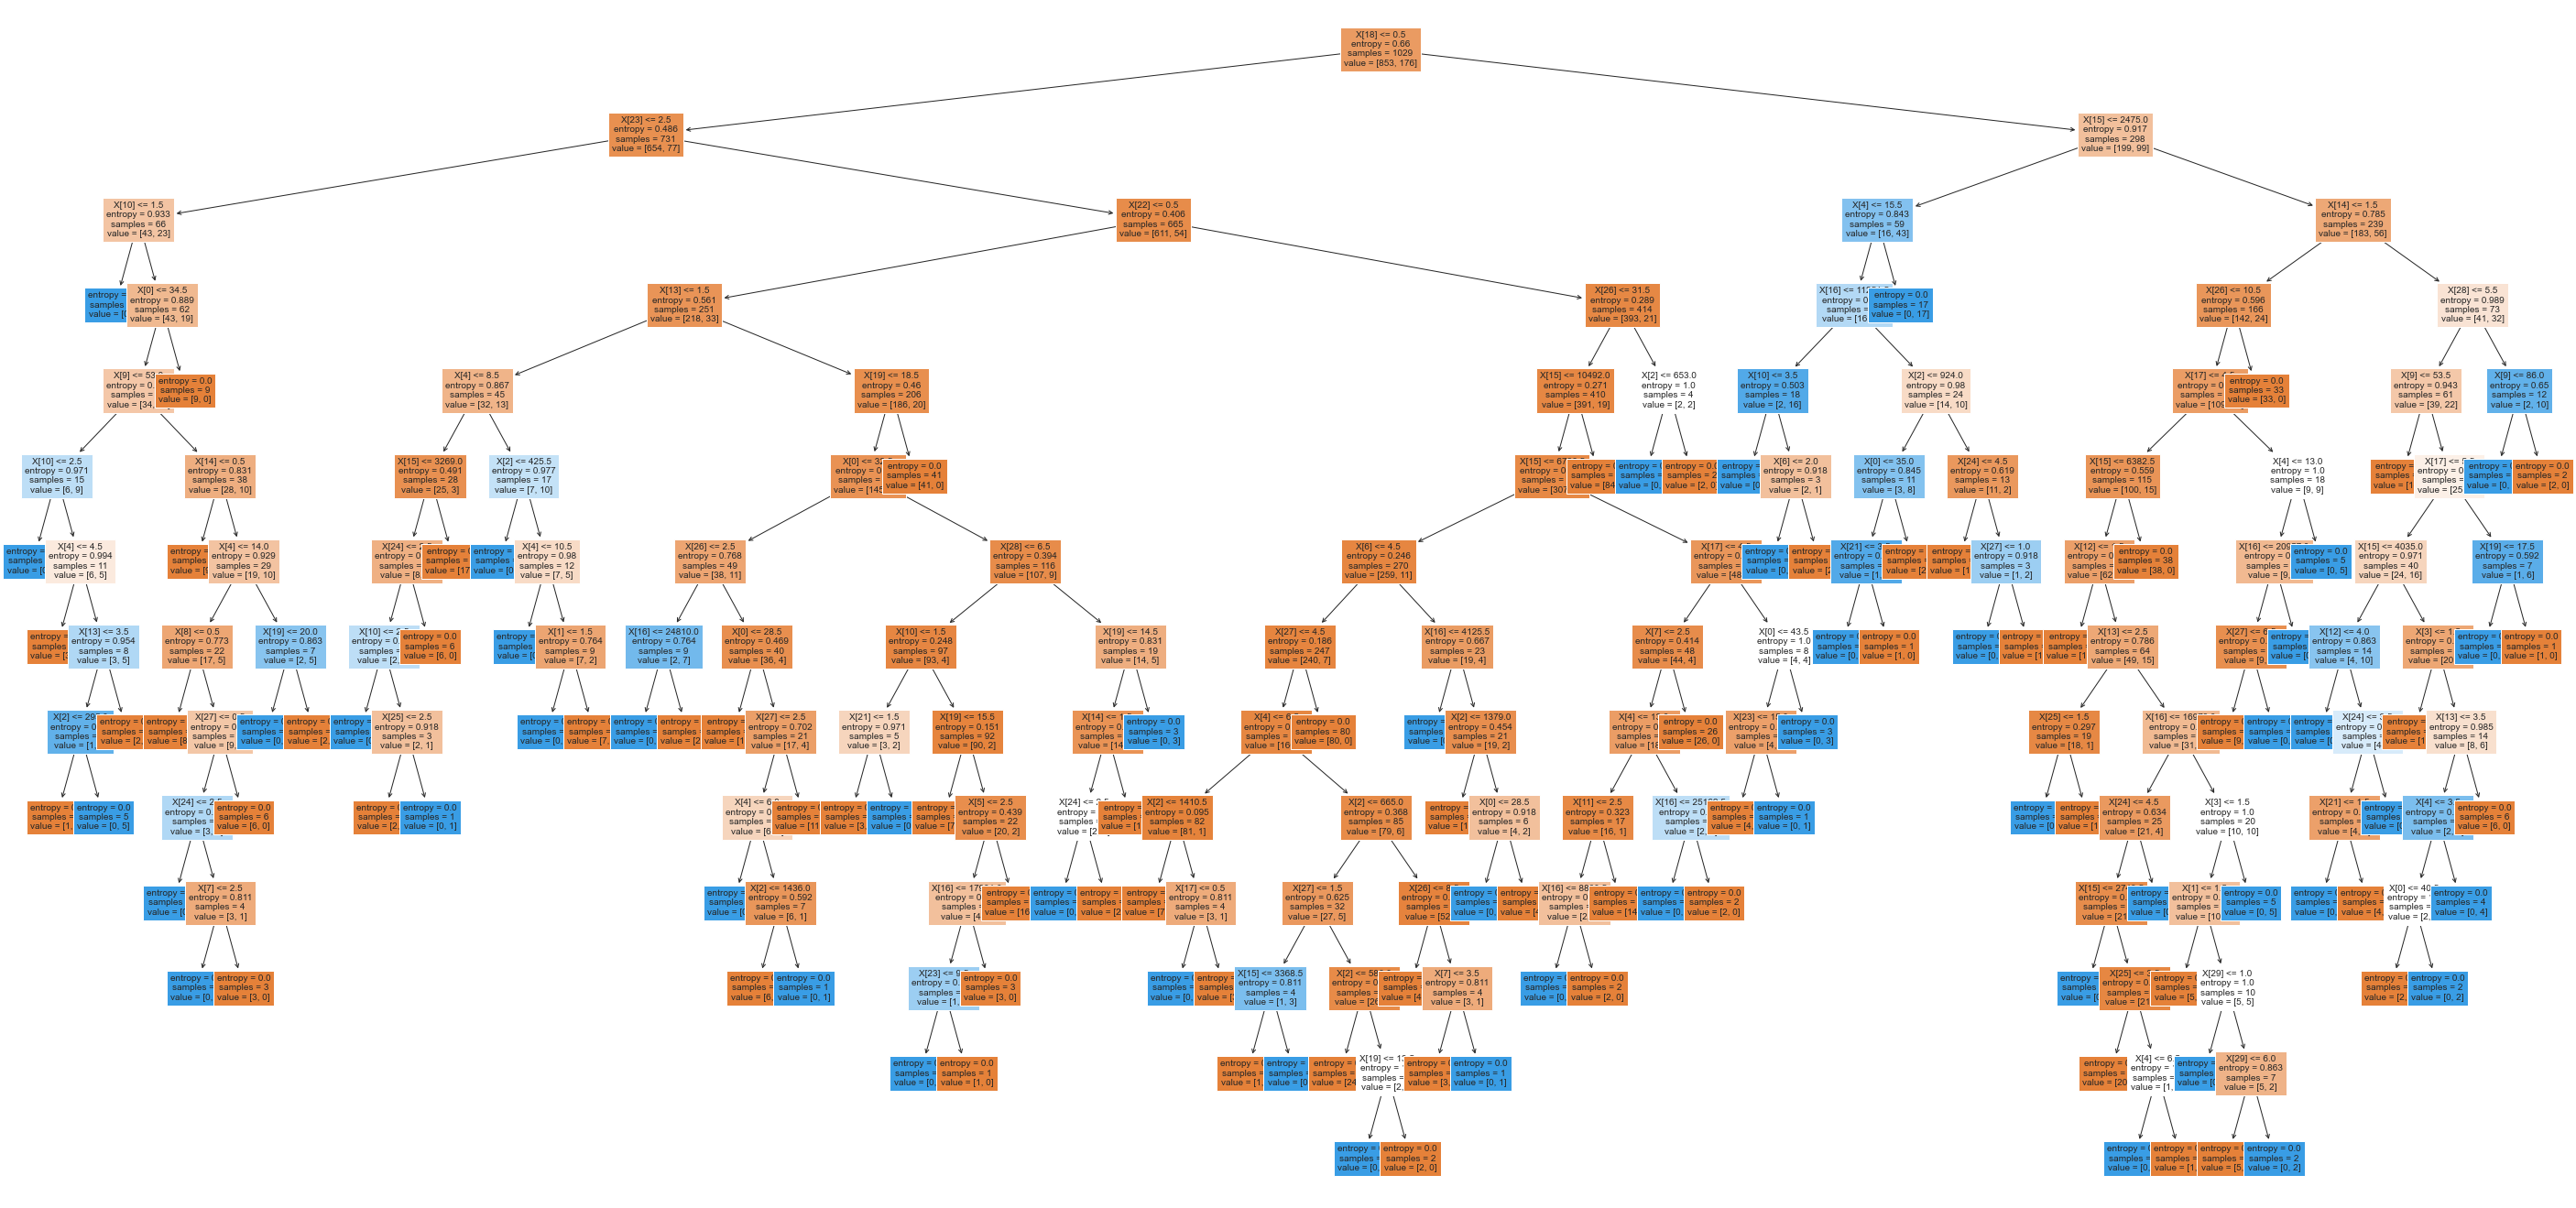

In [27]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [28]:
#RandomForest
#accuracy cao nhất => chọn random forest
from sklearn.ensemble import RandomForestClassifier
import time
rf_scores =  []
rfc = RandomForestClassifier()
start_rf =time.time()
rf_pred = rfc.fit(X_train, y_train).predict(X_test)
end_rf= time.time()
times_rf = timedelta(seconds=round(end_rf - start_rf,4)).total_seconds()
print ("time", times_rf)
rf_score = metrics.accuracy_score(y_test, rf_pred)
accuracies_rf_score = rf_score
print("Accuracy", rf_score)
print("Report", metrics.classification_report(y_test, rf_pred))

time 0.2795
Accuracy 0.8662131519274376
Report               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.8662131519274376')

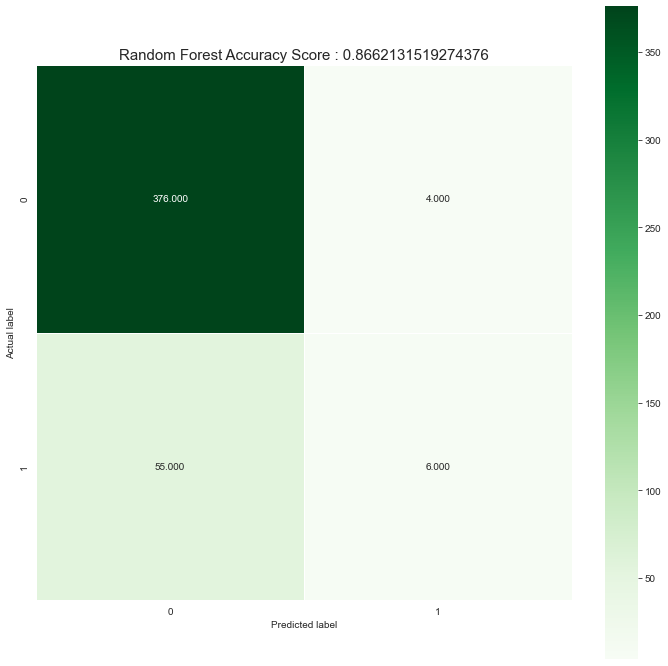

In [29]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(12,12))
ax= sns.heatmap(rf_cm,annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title ='Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title, size =15)

In [30]:
#KNearest
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
start_knn = time.time()
knn_scores =  []

for i in range (1,12):
    knc = KNeighborsClassifier(i)
    knn_pred = knc.fit(X_train, y_train).predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, knn_pred))
    max_knn_score = max (knn_scores)
knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn =time.time()
times_knn = timedelta(seconds=round(end_knn - start_knn,4)).total_seconds()
print('Highest Accuracy Score : {}% with k = {}'.format(max_knn_score*100, list(map(lambda x: x + 1, knn_score_ind))))
print ('Time', times_knn)
knn_score = max_knn_score
accuracies_max_knn = knn_score
print("Accuracy", accuracies_max_knn)
print("Report", metrics.classification_report(y_test, knn_pred))

Highest Accuracy Score : 85.4875283446712% with k = [6, 10]
Time 0.2694
Accuracy 0.854875283446712
Report               precision    recall  f1-score   support

           0       0.86      0.98      0.92       380
           1       0.14      0.02      0.03        61

    accuracy                           0.85       441
   macro avg       0.50      0.50      0.47       441
weighted avg       0.76      0.85      0.80       441



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 0.854875283446712')

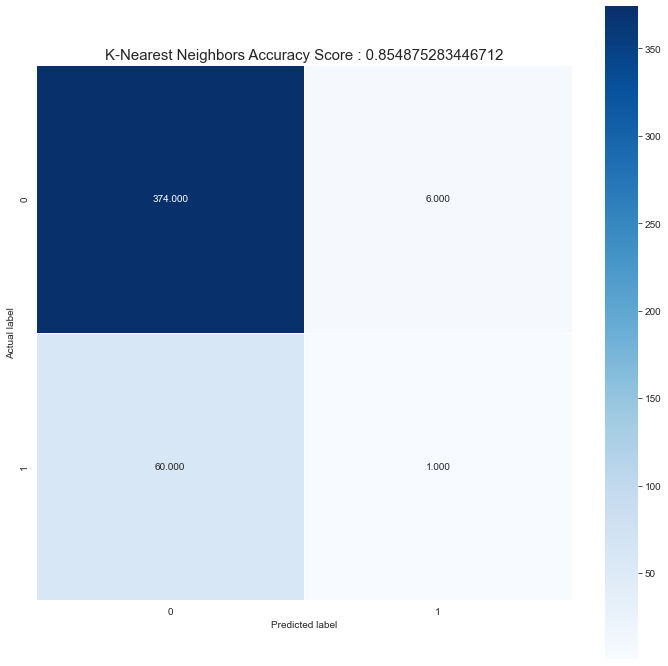

In [31]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(12,12))
ax =sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title = 'K-Nearest Neighbors Accuracy Score : {0}'.format(knn_score)
plt.title(title, size =15)

In [32]:
#Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
start_lr = time.time()
lr_scores =  []

In [33]:
lr = LogisticRegression(max_iter=3300)
start_lr = time.time()
lr_pred = lr.fit(X_train, y_train).predict(X_test)
end_lr = time.time()
times_lr = timedelta(seconds=round(end_lr - start_lr,4)).total_seconds()
print("Time Logistic Regression (lr)",times_lr)

Time Logistic Regression (lr) 1.4067


C:\Users\TuanKhanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [34]:
lr_score = metrics.accuracy_score(y_test, lr_pred)
accuracies_logistic_regression=lr_score
print("Accuracy", lr_score)
print("Report", metrics.classification_report(y_test, lr_pred,labels=np.unique(lr_pred)))

Accuracy 0.8639455782312925
Report               precision    recall  f1-score   support

           0       0.89      0.97      0.92       380
           1       0.52      0.23      0.32        61

    accuracy                           0.86       441
   macro avg       0.70      0.60      0.62       441
weighted avg       0.84      0.86      0.84       441



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.8639455782312925')

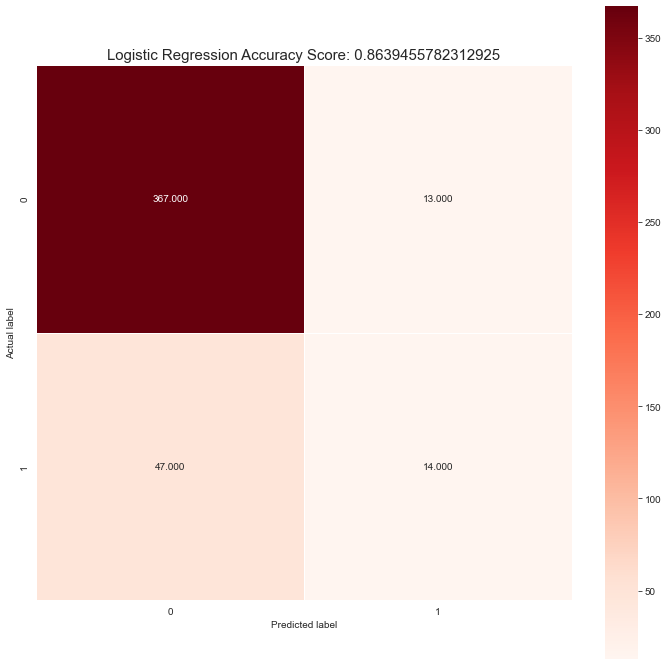

In [35]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(12,12))
sns.heatmap(lr_cm,annot=True, fmt=".3f", linewidths=.5, square =True, cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression Accuracy Score: {0}'. format(lr_score)
plt.title(title, size =15)

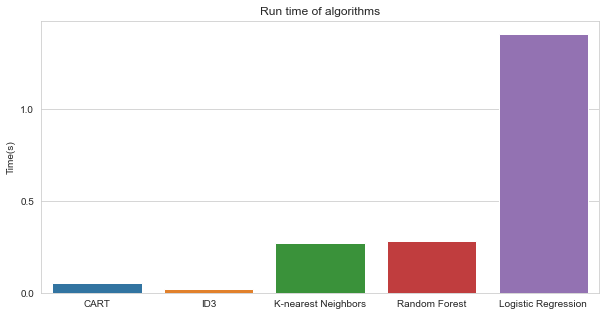

In [36]:
colors = ['purple', 'grey', 'blue', 'green', 'red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,8,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algorithms')
sns.barplot(x=list(['CART','ID3','K-nearest Neighbors','Random Forest','Logistic Regression']), y= list([times_cart, times_id3, times_knn, times_rf, times_lr]))
plt.show()

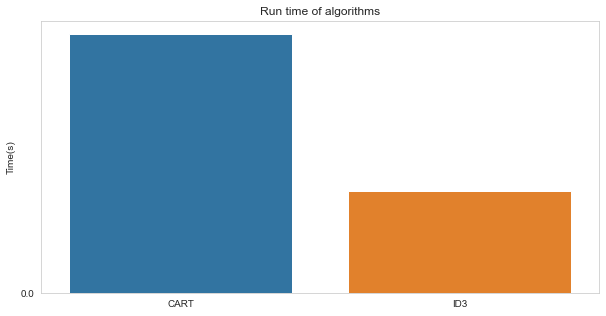

In [37]:
colors = ['purple', 'grey']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,8,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algorithms')
sns.barplot(x=list(['CART','ID3']), y= list([times_cart, times_id3]))
plt.show()

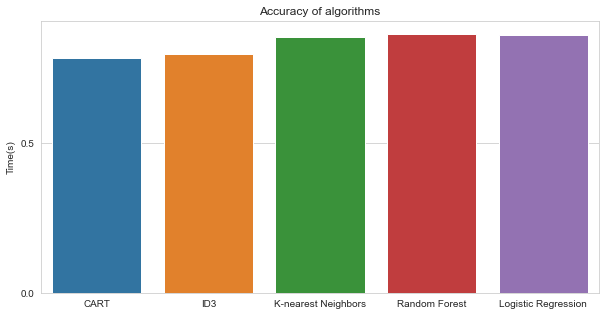

In [38]:
colors = ['purple', 'grey', 'blue', 'green', 'red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,1,0.5))
plt.ylabel('Time(s)')
plt.title('Accuracy of algorithms')
sns.barplot(x=list(['CART','ID3','K-nearest Neighbors','Random Forest','Logistic Regression']), y=list([accuracies_cart, accuracies_id3, accuracies_max_knn, accuracies_rf_score, accuracies_logistic_regression]))
plt.show()

# Kết luận:
1. Dựa vào thời gian chạy, ta có thể thấy thuật toán ID3 có thời gian chạy nhanh nhất, ngược lại, thuật toán Logistic có thời gian
chạy cao nhất.
ID3 < CART < RANDOM FOREST < K NEAREST < LOGISTIC
2. Dựa vào độ chính xác, ta có thể thấy thuật toán Random Forest và Logistic Regression có độ chính xác cao nhất,
khoảng 0.8639, nhưng nếu so về thời gian chạy thì thuật toán Random lại tối ưu hơn rất nhiều.
=> Thuật toán Random Forest được lựa chọn để thực hiện dự đoán.

# 6. Tìm ra thuộc tính có độ tin cậy cao nhất cho thuật toán Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
#tim thuoc tinh co do tin cay cao
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_, index =df_marketing.columns).sort_values(ascending =False)
feature_imp

MonthlyIncome               0.081381
Age                         0.064323
OverTime                    0.058994
TotalWorkingYears           0.054368
DailyRate                   0.051661
MonthlyRate                 0.049296
DistanceFromHome            0.048158
HourlyRate                  0.046432
NumCompaniesWorked          0.041991
YearsAtCompany              0.039546
YearsWithCurrManager        0.035149
YearsInCurrentRole          0.034193
StockOptionLevel            0.031506
PercentSalaryHike           0.030722
JobRole                     0.030029
MaritalStatus               0.027826
YearsSinceLastPromotion     0.026263
TrainingTimesLastYear       0.025582
JobSatisfaction             0.025062
JobLevel                    0.025051
EnvironmentSatisfaction     0.024601
EducationField              0.023562
RelationshipSatisfaction    0.022960
JobInvolvement              0.022836
WorkLifeBalance             0.019484
Education                   0.018538
Department                  0.013996
B

In [41]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel (RandomForestClassifier(n_estimators = 100))
sel.fit (X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [42]:
selected_feat = X_train.columns[(sel.get_support())]
len(selected_feat)

12

In [43]:
print(selected_feat)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole'],
      dtype='object')


Chọn Age, MonthlyIncome, TotalWorkingYears, MonthlyRate,Overtime, DailyRate làm thuộc tính tin cậy.

# 7. Thực hiện code 1 app

In [44]:
df_marketing.drop(columns=["Age", "BusinessTravel", "Department", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobLevel" , "JobRole", "JobSatisfaction", "MaritalStatus",
"NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", 
"TrainingTimesLastYear", "WorkLifeBalance", "DistanceFromHome", "HourlyRate", 
"YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"], inplace=True)

In [45]:
df_marketing.head()

DailyRate  MonthlyIncome  MonthlyRate  OverTime  TotalWorkingYears
0       1102           5993        19479         1                  8
1        279           5130        24907         0                 10
2       1373           2090         2396         1                  7
3       1392           2909        23159         1                  8
4        591           3468        16632         0                  6